In [3]:
%matplotlib inline

import networkx as nx
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt

from multiprocessing import Pool

In [2]:
def simulate(G, H, trialtime, thresh, p_transmit, infected):    
    results = np.zeros([trialtime])
    #redun_connections= np.ones([trialtime])
    #timetaken = np.zeros([trialtime])
    
    for t in range(trialtime):
        aware = set([])
        results[t] = len(infected)
        for node in infected:
            if np.random.uniform(low=0.0, high=1.0, size=None) < p_transmit:
                aware.update({n for n in H.neighbors(node)})
        temp = copy.deepcopy(aware)
        temp_infect = copy.deepcopy(infected)

        for node in temp:
            neighH = {n for n in H.neighbors(node)}
            neighG = {n for n in G.neighbors(node)}
            #timetaken[t] = max(len(neighH), timetaken[t])
            #redun_connections[t] = len(neighH - neighH.intersection(neighG))
            neighset = neighG

            if len(temp_infect.intersection(neighset)) >= thresh*len(neighset) :
                infected.update({node})
            else: 
                infected = infected-{node}
    #time = np.cumsum(timetaken)
    #time = np.insert(time[range(trialtime-1)], 0, 0)
    
    #return results, timetaken, redun_connections
    return results
    

In [3]:
def comm_network(G, n_swap):
    H = G.copy()
    H = nx.double_edge_swap(H, n_swap, max_tries=n_swap*len(G));
    return H

In [4]:
def powerlaw(D, lamb, p0):
    x = np.arange(1,D)
    x = np.asarray(x, dtype=float)
    x = x**(-lamb)
    x = x/x.sum(axis=0)*(1-p0)
    x = np.insert(x, 0, p0, axis=0)
    return x

In [71]:
N = 100
D = N-1 #maximum degree
lamb = 1.9


degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())


In [72]:
S = np.sum(degree_seq)

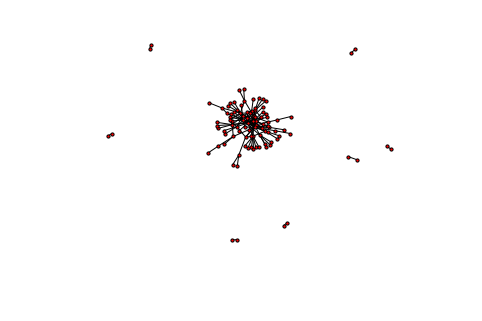

In [74]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=10)

In [35]:
def go(trialnumber, max_nswap):
    trialtime = 10
    initial_infection = 0.3
    thresh = 0.3
    p_transmit = 1

    #trialnumber = 1000

#    times = np.zeros([finesse, trialtime])
    finesse = max_nswap
    results_finegrain = np.zeros([finesse,trialtime])
    for T in range(trialnumber):
        infected = set(np.random.choice([n for n in G.nodes()], int(len(G)*initial_infection)))

        for i in range(finesse):

            n_swap = int(float((i)/(finesse))*max_nswap)
            #n_swap = i
            H = comm_network(G, n_swap)
            #H = nx.connected_watts_strogatz_graph(N, , 1, tries=100, seed=None)
            #H = nx.erdos_renyi_graph(N, 1.74/N)
            #H = G
            R = simulate(G, H, trialtime, thresh, p_transmit, copy.deepcopy(infected))
            results_finegrain[i] = R + results_finegrain[i]
            #results[i]= R[0] + results[i]
            #times[i] = R[1] + times[i]

            #plt.plot(out[1][window], out[0][window])
    return results_finegrain/trialnumber/len(G)


In [36]:
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

In [75]:
pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4

Process ForkPoolWorker-16:
Process ForkPoolWorker-13:
Process ForkPoolWorker-14:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-15:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/que

In [76]:
w= range(10)

for i in range(1,finesse):
    #timer = np.cumsum(times[i][w])/trialnumber
    #timer = np.insert(timer[range(trialtime-1)], 0, 0)
    #plt.plot(timer, results[i][w]/N/trialnumber)
    plt.plot(results_finegrain[i][w]/N/trialnumber, '-')
    '''
    if results[i][trialtime-1]<0.7*N*trialnumber:
        print(i)
    '''
#plt.plot(times[2], results[2], 'r+')
#infected

NameError: name 'finesse' is not defined

In [ ]:
np.sum(np.array([d for d in H.degree()]).T[1])

In [ ]:
np.sum(np.array([d for d in G.degree()]).T[1])

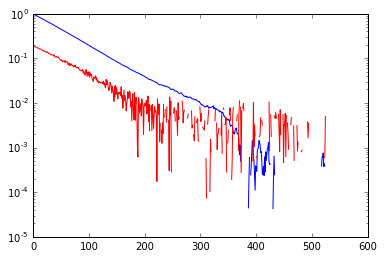

In [113]:
flip = infectionsize.T
finalsize = flip[len(flip)-1]
rescaled = finalsize - np.average(finalsize[range(400,len(finalsize)-1)])
rescaled_cum = np.cumsum(rescaled)
int_curve = 1-rescaled_cum / rescaled_cum[len(rescaled_cum)-1]
plt.semilogy(int_curve,'b-')
plt.semilogy(rescaled, 'r-')



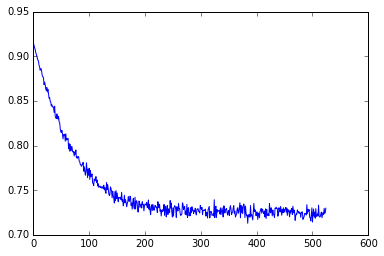

In [114]:
plt.plot(finalsize)

In [118]:
m, b = np.polyfit(np.arange(300), np.log(int_curve[range(300)]), 1)
print(m)

-0.0155598050267


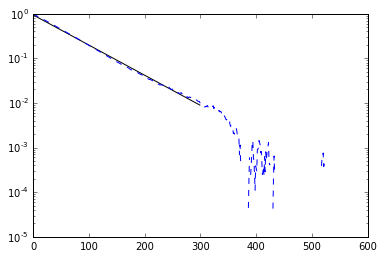

In [119]:
plt.semilogy(np.exp(b)*np.exp(m*np.arange(300)), 'k-')
plt.semilogy(int_curve,'b--')

In [105]:
np.save('power_1p9_N_100_trials_1000.npy', infectionsize)

In [95]:
list(range(1,2))

[1]

In [108]:
N = 100
D = N-1 #maximum degree
lamb = 3.1


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4
np.save('power_3p1_N_100_trials_1000.npy', infectionsize)

In [109]:
N = 100
D = N-1 #maximum degree
lamb = 2.9


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4
np.save('power_2p9_N_100_trials_1000.npy', infectionsize)

In [110]:
N = 100
D = N-1 #maximum degree
lamb = 2.7


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4
np.save('power_2p7_N_100_trials_1000.npy', infectionsize)

In [111]:
N = 100
D = N-1 #maximum degree
lamb = 2.3


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4
np.save('power_2p3_N_100_trials_1000.npy', infectionsize)

In [112]:
N = 100
D = N-1 #maximum degree
lamb = 2.1


S = 1
while S % 2 != 0:
    degree_seq = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lamb, 0.0))
    S = np.sum(degree_seq)

Gfull=nx.configuration_model(list(degree_seq))
G=nx.Graph(Gfull)
G.remove_edges_from(G.selfloop_edges())

S = np.sum(degree_seq)
def Go(trialnumber):
    return go(trialnumber, int(S*1.5))

pool= Pool()
results = pool.map(Go, [250, 250, 250, 250])
infectionsize = np.asarray(sum(results), dtype=float)/4
np.save('power_2p1_N_100_trials_1000.npy', infectionsize)

In [120]:
 type(nx.betweenness_centrality(G))

dict

In [4]:
G = nx.complete_graph(5)
G.nodes()

NodeView((0, 1, 2, 3, 4))